In [15]:
# Importing libraries

import scipy.io
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

from sklearn.datasets import fetch_openml

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [3]:
# Loading data

mnist = fetch_openml("mnist_784", as_frame = False)

mnist

/Users/Rosie/Library/Python/3.8/lib/python/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

In [4]:
X, y = mnist.data, mnist.target # Assigning the data to X and the target to y

In [5]:
# Creating train, development, and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 42) # 70% train set, 30% test set
X_dev, X_test, y_dev, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state= 42) # Splits test set in half, making on half dev set, so now 70% is train, 15% is development, 15% is test

# The Development set will be used to test the model on for fine tuning, allowing for testing while keeping the model blind to the Test set. The final model will then be tested on the Test data

**Creating Model**

In [6]:
forest = RandomForestClassifier(n_estimators = 100, random_state = 42, max_depth = 5) # Random Forest model

forest.fit(X_train, y_train) # Fitting to the train set

print("Accuracy:", forest.score(X_dev, y_dev))

Accuracy: 0.86


max_depth will now be tuned for increased accuracy, as adjusting max_depth by a small amount can make a big difference in accuracy. The number of branches increases exponentially with each increase in depth, which allows the tree a significantly greater number of options by just increasing the depth by 1. This increase in options can result in better accuracy and precision, though only up to a point as it is necessary to avoid overfitting. Therefore it is important with max_depth to find a balance between accuracy, overfitting, and computational efficiency. 

In [7]:
# Testing different depths

pruned_scores_dev = [] # List in which to store the accuracy scores for each depth on the development set
pruned_scores_train = [] # List in which to store the accuracy scores for each depth on the training set

for d in range(2,21):
  clf_tree = RandomForestClassifier(n_estimators = 100, random_state = 42, max_depth = d) # Prunes tree
  clf_tree.fit(X_train, y_train) # Trains tree to specified depth
  score_dev = clf_tree.score(X_dev, y_dev) # Computes accuracy score
  score_train = clf_tree.score(X_train, y_train)
  pruned_scores_dev.append(score_dev) # Stores the accuracy score for dev sets
  pruned_scores_train.append(score_train) # Stores the accuracy score for training sets

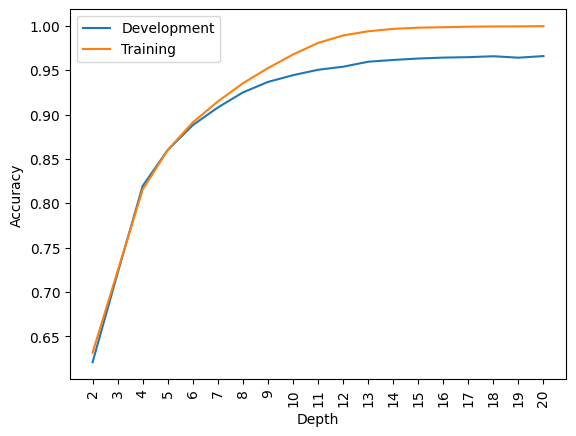

In [8]:
fig, ax = plt.subplots()
ax.plot(range(2,21), pruned_scores_dev) # Plotting the pruned scores from the development set
ax.plot(range(2,21), pruned_scores_train) # Plotting the pruned scores from the training set
ax.legend(['Development', 'Training'])
plt.xlabel("Depth")
plt.ylabel("Accuracy")
ax.xaxis.set_ticks(range(2,21))
plt.xticks(rotation=90)
plt.show()

Range 20 to 36 will be investigated separately as the above code can take 20+ minutes to run, and increases and decreases in this range are small


In [9]:

pruned_scores_dev = [] # List in which to store the accuracy scores for each depth on the development set
pruned_scores_train = [] # List in which to store the accuracy scores for each depth on the training set

for d in range(20,36):
  clf_tree = RandomForestClassifier(n_estimators = 100, random_state = 42, max_depth = d) # Creates tree at different depths based on what 'd' is
  clf_tree.fit(X_train, y_train) # Trains tree at specified depth
  score_dev = clf_tree.score(X_dev, y_dev) # Computes accuracy score
  score_train = clf_tree.score(X_train, y_train)
  pruned_scores_dev.append(score_dev) # Stores the accuracy score for dev sets
  pruned_scores_train.append(score_train) # Stores the accuracy score for training sets

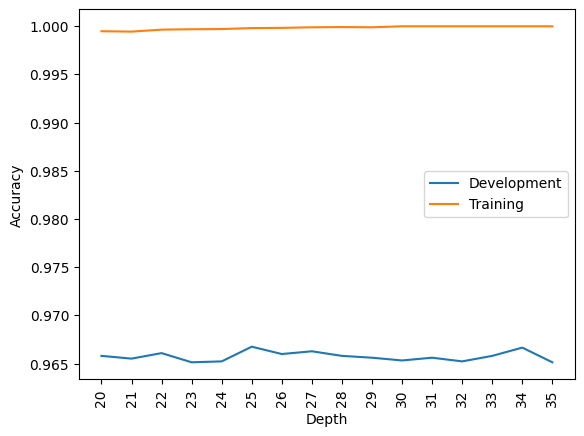

In [10]:
fig, ax = plt.subplots()
ax.plot(range(20,36), pruned_scores_dev) # Plotting the pruned scores from the development set
ax.plot(range(20,36), pruned_scores_train) # Plotting the pruned scores from the training set
ax.legend(['Development', 'Training'])
plt.xlabel("Depth")
plt.ylabel("Accuracy")
ax.xaxis.set_ticks(range(20,36))
plt.xticks(rotation=90)
plt.show()

Accuracy peaks slightly at 25, the tree will be pruned here as allowing much more depth will cost efficiency and eventually accuracy.

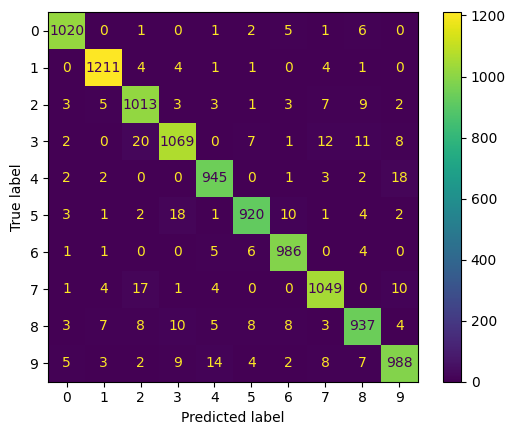

In [11]:
forest = RandomForestClassifier(n_estimators = 100, random_state = 42, max_depth = 25) # Random Forest model

forest.fit(X_train, y_train) # Fitting to the train set

# Predictions on test data

y_pred = forest.predict(X_test).reshape(-1,1)

# Confusion Matrix

from sklearn import metrics 

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix) 

cm_display.plot()
plt.show()

The model struggles most to differentiate between 3s and 2s, 7s and 2s, 5s and 3s, 8s and 3s, and 9s and 4s. These are all numbers with visual similarities and the potential to be misidentified by humans as well.

Overall, it is best at identifying 1s, 3s, and 7s, struggling the most with 5s, 8s, and 4s.

In [37]:
print("Accuracy: ", metrics.f1_score(y_test, y_pred, average = 'macro'))
print("Precision: ", metrics.precision_score(y_test, y_pred, average = 'macro'))
print("Recall: ", metrics.recall_score(y_test, y_pred, average = 'macro'))
print("F1 Score: ", metrics.f1_score(y_test, y_pred, average = 'macro'))

Accuracy:  0.9652378327752809
Precision:  0.9652977703237697
Recall:  0.9652347038866369
F1 Score:  0.9652378327752809
